# Random Forest model

## Import data and set up

In [27]:
# import relevant packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

%matplotlib inline

In [2]:
# set up paths
data_dir = "../data"

In [11]:
# import data 
X_train = pd.read_csv(os.path.join(data_dir, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(data_dir, 'X_test.csv'))
y_train = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))
y_test = pd.read_csv(os.path.join(data_dir, 'y_test.csv'))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(397900, 25)
(99476, 25)
(397900, 1)
(99476, 1)


In [12]:
def metric(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return 100 * np.linalg.norm((actuals - preds) / actuals) / np.sqrt(preds.shape[0])

In [13]:
X_train.columns

Index(['Date', 'Store', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Month', 'Year',
       'Weekday', 'Holiday', 'Customers_enc', 'StoreType_enc',
       'Assortment_enc', 'Store_enc'],
      dtype='object')

In [14]:
# Check features that have no variance
novar_cols = [colname for colname in X_train.var().index if X_train.var()[colname]==0]
novar_cols

<ipython-input-14-390440bdf730>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  novar_cols = [colname for colname in X_train.var().index if X_train.var()[colname]==0]


['Open']

In [15]:
train_cols = ['Promo', 'SchoolHoliday', 'CompetitionDistance', 'Month',
              'Weekday', 'Holiday', 'Customers_enc', 'StoreType_enc', 
              'Assortment_enc', 'Store_enc']

X_train = X_train[train_cols]
X_test = X_test[train_cols]
print(X_train.columns)
print(X_test.columns)

Index(['Promo', 'SchoolHoliday', 'CompetitionDistance', 'Month', 'Weekday',
       'Holiday', 'Customers_enc', 'StoreType_enc', 'Assortment_enc',
       'Store_enc'],
      dtype='object')
Index(['Promo', 'SchoolHoliday', 'CompetitionDistance', 'Month', 'Weekday',
       'Holiday', 'Customers_enc', 'StoreType_enc', 'Assortment_enc',
       'Store_enc'],
      dtype='object')


In [16]:
y_train = y_train.to_numpy().flatten()
y_test = y_test.to_numpy().flatten()

## Random Forest

In [17]:
model = RandomForestRegressor(criterion="mse", random_state=42)

In [18]:
# define parameter space for grid search
parameter_space = {
    'n_estimators': [100, 150],
    'max_features': [0.6, 0.8],
    'max_depth': [5, 8]
}

# n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node
# bootstrap = method for sampling data points (with or without replacement)

In [19]:
my_scorer = make_scorer(metric, greater_is_better=False)

In [20]:
%%time
regr = GridSearchCV(model, parameter_space, scoring=my_scorer, 
                   n_jobs=None, cv=5, return_train_score = True)
regr.fit(X_train, y_train)

CPU times: user 16min 23s, sys: 17.2 s, total: 16min 41s
Wall time: 18min 6s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 8], 'max_features': [0.6, 0.8],
                         'n_estimators': [100, 150]},
             return_train_score=True,
             scoring=make_scorer(metric, greater_is_better=False))

In [21]:
#Best estimator
print('Best estimator:\n', regr.best_estimator_)

# Best parameter setting
print('Best parameters found:\n', regr.best_params_)

# Scorer used on the held out data to choose best parameters for the model
print('Scorer used on the held out data to choose the best parameters for the model:', regr.scorer_)

# Mean cross-validated score of the best estimator
print('Best mean cross-validated score:', regr.best_score_)

Best estimator:
 RandomForestRegressor(max_depth=8, max_features=0.6, n_estimators=150,
                      random_state=42)
Best parameters found:
 {'max_depth': 8, 'max_features': 0.6, 'n_estimators': 150}
Scorer used on the held out data to choose the best parameters for the model: make_scorer(metric, greater_is_better=False)
Best mean cross-validated score: -18.94725962282999


In [22]:
# All results
cv_results = pd.DataFrame.from_dict(regr.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.183960,0.122473,0.261417,0.001058,5,0.6,100,"{'max_depth': 5, 'max_features': 0.6, 'n_estim...",-20.878259,-21.199966,...,-21.011389,0.113530,6,-20.997400,-20.953789,-20.979164,-21.015521,-20.979529,-20.985081,0.020608
1,16.718653,0.129006,0.386717,0.001297,5,0.6,150,"{'max_depth': 5, 'max_features': 0.6, 'n_estim...",-20.824340,-21.155027,...,-20.968471,0.114939,5,-20.943240,-20.910884,-20.942337,-20.977691,-20.938673,-20.942565,0.021228
2,15.955496,3.471641,0.262085,0.001777,5,0.8,100,"{'max_depth': 5, 'max_features': 0.8, 'n_estim...",-20.989288,-21.287187,...,-21.102549,0.117325,7,-21.073190,-21.037733,-21.052296,-21.114312,-21.092137,-21.073934,0.027353
3,21.341975,0.067508,0.392340,0.002779,5,0.8,150,"{'max_depth': 5, 'max_features': 0.8, 'n_estim...",-21.010018,-21.292031,...,-21.110516,0.114126,8,-21.093648,-21.038419,-21.068620,-21.117122,-21.093817,-21.082325,0.026783
4,16.324466,0.161483,0.397848,0.003084,8,0.6,100,"{'max_depth': 8, 'max_features': 0.6, 'n_estim...",-18.865531,-19.114565,...,-18.953061,0.131024,2,-18.904499,-18.840073,-18.858518,-18.920044,-18.860982,-18.876823,0.030234
5,61.002110,73.328173,0.595690,0.005095,8,0.6,150,"{'max_depth': 8, 'max_features': 0.6, 'n_estim...",-18.854329,-19.107515,...,-18.947260,0.132570,1,-18.895327,-18.830199,-18.850992,-18.912608,-18.863833,-18.870592,0.029795
6,20.740716,0.157861,0.397967,0.002882,8,0.8,100,"{'max_depth': 8, 'max_features': 0.8, 'n_estim...",-18.937581,-19.189236,...,-19.039534,0.131144,3,-18.969601,-18.920898,-18.967186,-19.019751,-18.946463,-18.964779,0.032594
7,30.904873,0.088811,0.595973,0.005023,8,0.8,150,"{'max_depth': 8, 'max_features': 0.8, 'n_estim...",-18.931384,-19.195153,...,-19.040604,0.132121,4,-18.964997,-18.921992,-18.970358,-19.023579,-18.943427,-18.964871,0.033986


In [23]:
y_pred = regr.predict(X_test)
value = metric(y_pred, y_test)
print(value)

24.39366276582127


In [30]:
model = RandomForestRegressor(n_estimators=200,
                              max_features=0.6, 
                              max_depth= 7,
                              criterion="mse", 
                              random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
value = metric(y_pred, y_test)
print(value)

25.570356220001763


In [26]:
# Print feature importances
print(model.feature_importances_)

[1.67274863e-01 1.99797081e-03 2.96308802e-03 2.60004748e-02
 5.21639399e-02 3.45319120e-04 1.37207319e-01 3.15826117e-03
 1.43101682e-03 6.07457747e-01]


Index(['Promo', 'SchoolHoliday', 'CompetitionDistance', 'Month', 'Weekday',
       'Holiday', 'Customers_enc', 'StoreType_enc', 'Assortment_enc',
       'Store_enc'],
      dtype='object')


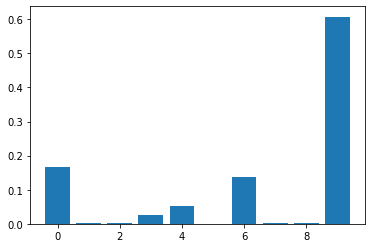

In [29]:
# plot feature importances
print(X_train.columns)
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()